# [Keras autoencoder example](https://blog.keras.io/building-autoencoders-in-keras.html)

# 1. simplest auto encoder model

In [125]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)


In [126]:
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [127]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [128]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [129]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.3767 - val_loss: 0.2735
Epoch 2/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.2675 - val_loss: 0.2582
Epoch 3/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.2477 - val_loss: 0.2344
Epoch 4/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.2259 - val_loss: 0.2158
Epoch 5/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.2108 - val_loss: 0.2034
Epoch 6/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.1999 - val_loss: 0.1936
Epoch 7/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.1912 - val_loss: 0.1857
Epoch 8/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1839 - val_loss: 0.1790
Epoch 9/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.1775 - val_loss: 0.1

60000/60000 [==============================] - 4s 70us/step - loss: 0.1016 - val_loss: 0.0999
Epoch 78/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1015 - val_loss: 0.0998
Epoch 79/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.1014 - val_loss: 0.0998
Epoch 80/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.1013 - val_loss: 0.0997
Epoch 81/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.1012 - val_loss: 0.0995
Epoch 82/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.1011 - val_loss: 0.0994
Epoch 83/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.1010 - val_loss: 0.0994
Epoch 84/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.1009 - val_loss: 0.0993
Epoch 85/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.1008 - val_loss: 0.0992
Epoch 86/100
60000/60000 [========================

In [130]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [131]:
print(encoded_imgs.mean())

8.34071


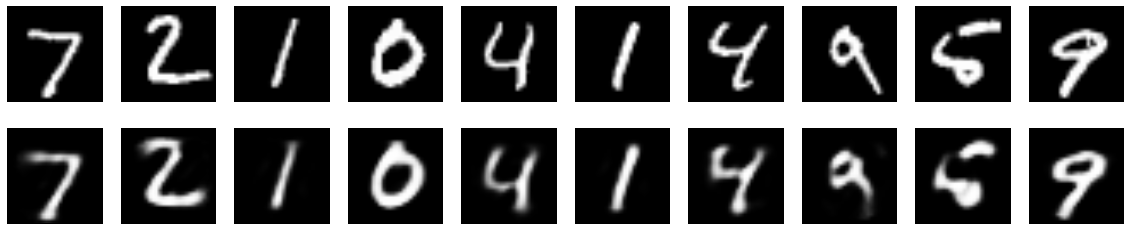

In [132]:
import matplotlib.pyplot as plt

%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 2. Sparsity Constraint on encoded representations

In [111]:
from keras import regularizers

# this is the size of our encoded representations
encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
#encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [112]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.6836 - val_loss: 0.6607
Epoch 2/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.6440 - val_loss: 0.6273
Epoch 3/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.6111 - val_loss: 0.5952
Epoch 4/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.5802 - val_loss: 0.5656
Epoch 5/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.5519 - val_loss: 0.5387
Epoch 6/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.5264 - val_loss: 0.5146
Epoch 7/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.5037 - val_loss: 0.4932
Epoch 8/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.4836 - val_loss: 0.4744
Epoch 9/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.4658 - val_loss: 0.4577
Epoch

In [113]:
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [114]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

### avarage of encoded_imgs

In [115]:
print(encoded_imgs.mean())

5.3046165e-06


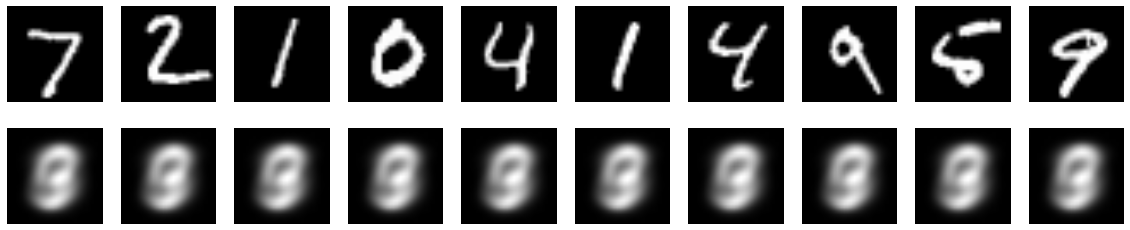

In [116]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Looks not good as expected～

# 3. Deep autoencoder

In [133]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [134]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 129us/step - loss: 0.3496 - val_loss: 0.2649
Epoch 2/100
60000/60000 [==============================] - 7s 111us/step - loss: 0.2595 - val_loss: 0.2549
Epoch 3/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.2470 - val_loss: 0.2389
Epoch 4/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.2317 - val_loss: 0.2239
Epoch 5/100
60000/60000 [==============================] - 7s 109us/step - loss: 0.2172 - val_loss: 0.2094
Epoch 6/100
60000/60000 [==============================] - 7s 120us/step - loss: 0.2044 - val_loss: 0.1982
Epoch 7/100
60000/60000 [==============================] - 7s 117us/step - loss: 0.1927 - val_loss: 0.1863
Epoch 8/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.1830 - val_loss: 0.1782
Epoch 9/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.1764 - val_los

60000/60000 [==============================] - 7s 120us/step - loss: 0.1048 - val_loss: 0.1044
Epoch 77/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.1046 - val_loss: 0.1036
Epoch 78/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.1044 - val_loss: 0.1034
Epoch 79/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.1041 - val_loss: 0.1034
Epoch 80/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.1040 - val_loss: 0.1019
Epoch 81/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.1036 - val_loss: 0.1022
Epoch 82/100
60000/60000 [==============================] - 6s 105us/step - loss: 0.1035 - val_loss: 0.1024
Epoch 83/100
60000/60000 [==============================] - 7s 109us/step - loss: 0.1033 - val_loss: 0.1035
Epoch 84/100
60000/60000 [==============================] - 7s 117us/step - loss: 0.1030 - val_loss: 0.1028
Epoch 85/100
60000/60000 [==================

In [135]:
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer3 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer1 = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer1(decoder_layer2(decoder_layer3(encoded_input))))

In [136]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

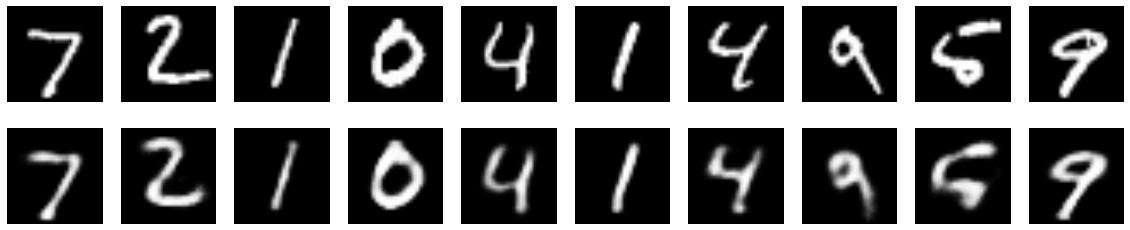

In [137]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
# note that we take them from the *test* set
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 4. Convolutional autoencoder

In [138]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [139]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

In [141]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 98s 2ms/step - loss: 0.1378 - val_loss: 0.1340
Epoch 2/50
60000/60000 [==============================] - 99s 2ms/step - loss: 0.1324 - val_loss: 0.1313
Epoch 3/50
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1283 - val_loss: 0.1237
Epoch 4/50
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1251 - val_loss: 0.1219
Epoch 5/50
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1226 - val_loss: 0.1204
Epoch 6/50
60000/60000 [==============================] - 88s 1ms/step - loss: 0.1204 - val_loss: 0.1161
Epoch 7/50
60000/60000 [==============================] - 85s 1ms/step - loss: 0.1184 - val_loss: 0.1169
Epoch 8/50
60000/60000 [==============================] - 85s 1ms/step - loss: 0.1172 - val_loss: 0.1135
Epoch 9/50
60000/60000 [==============================] - 87s 1ms/step - loss: 0.1156 - val_loss: 0.1152
Epoch

### also get the encoded images and decoded images

decoded_imgs are computed using autoencoder itself

In [142]:
decoded_imgs = autoencoder.predict(x_test)

In [152]:
encoder = Model(input_img, encoded)

In [155]:
encoded_imgs = encoder.predict(x_test)


In [156]:
encoded_imgs.shape

(10000, 4, 4, 8)

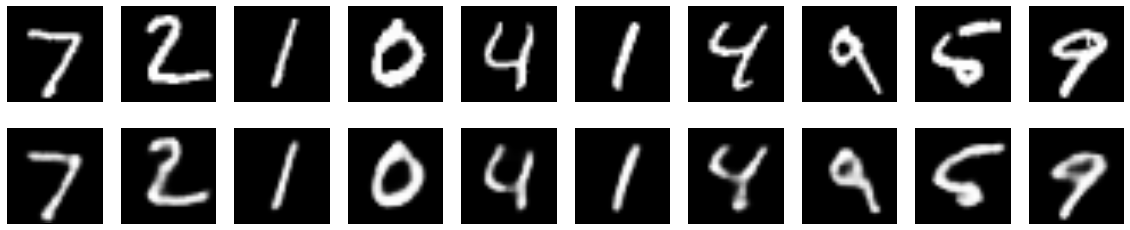

In [149]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## let's check the encoded image 

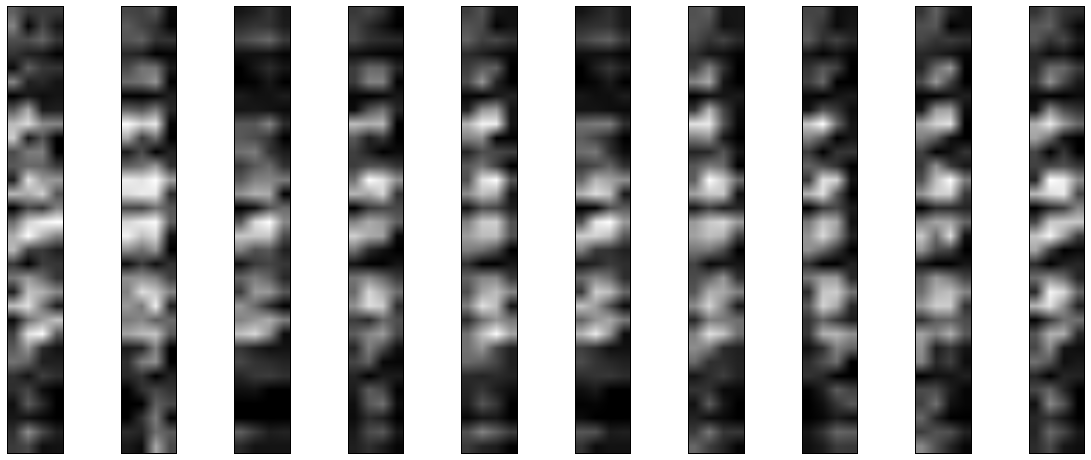

In [157]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(4, 4* 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 5. image denoise

In [158]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

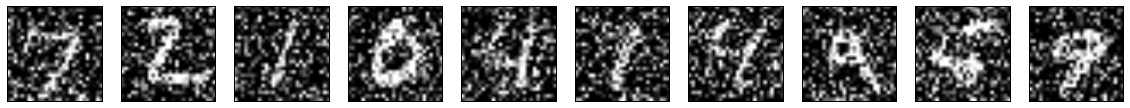

In [160]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [161]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [163]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 152s 3ms/step - loss: 0.1835 - val_loss: 0.1320
Epoch 2/10
60000/60000 [==============================] - 151s 3ms/step - loss: 0.1256 - val_loss: 0.1169
Epoch 3/10
60000/60000 [==============================] - 161s 3ms/step - loss: 0.1156 - val_loss: 0.1116
Epoch 4/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.1110 - val_loss: 0.1081
Epoch 5/10
60000/60000 [==============================] - 155s 3ms/step - loss: 0.1082 - val_loss: 0.1058
Epoch 6/10
60000/60000 [==============================] - 172s 3ms/step - loss: 0.1064 - val_loss: 0.1034
Epoch 7/10
60000/60000 [==============================] - 170s 3ms/step - loss: 0.1049 - val_loss: 0.1039
Epoch 8/10
60000/60000 [==============================] - 172s 3ms/step - loss: 0.1039 - val_loss: 0.1022
Epoch 9/10
60000/60000 [==============================] - 168s 3ms/step - loss: 0.1030 - val_loss: 0.1

In [164]:
decoded_imgs = autoencoder.predict(x_test_noisy)
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

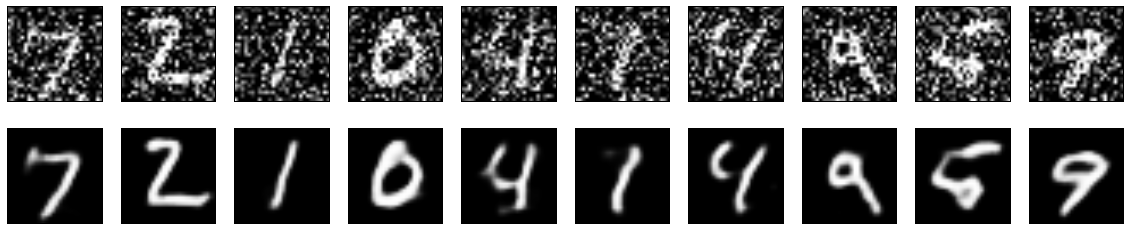

In [165]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## To note:

    the result looks good, but the effectiveness is not proven because the methodology is defective